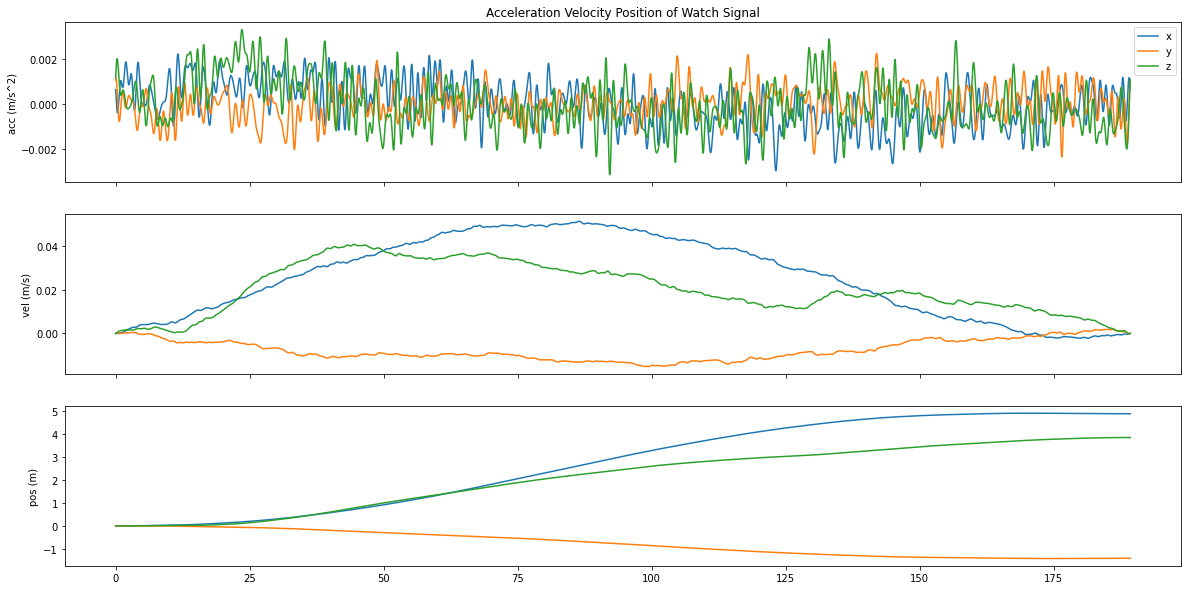

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Preprocessing
df = pd.read_csv('data/signal.csv')
df[['acc_x','acc_y','acc_z']] = df[['acc_x','acc_y','acc_z']]*9.81
df[['acc_x','acc_y','acc_z']] = df[['acc_x','acc_y','acc_z']]-np.mean(df[['acc_x','acc_y','acc_z']])
acc = df[['acc_x','acc_y','acc_z']]
t = list(df['acc_t'])
dt = .01

## Filtering
from lib.utils import low_pass_filter
cutoff = 1
accx_filt = low_pass_filter(signal=df['acc_x'],Hz=100,cutoff=cutoff)
accy_filt = low_pass_filter(signal=df['acc_y'],Hz=100,cutoff=cutoff)
accz_filt = low_pass_filter(signal=df['acc_z'],Hz=100,cutoff=cutoff)

df = pd.concat([df,pd.Series(accx_filt).rename('acc_x_filt')],axis=1)
df = pd.concat([df,pd.Series(accy_filt).rename('acc_y_filt')],axis=1)
df = pd.concat([df,pd.Series(accz_filt).rename('acc_z_filt')],axis=1)

acc = df[['acc_x_filt','acc_y_filt','acc_z_filt']]

## Integrate Accel => Velocity
vel = [np.zeros(3)]
for val in np.array(acc):
    vel.append(vel[-1]+val*dt)
vel.pop()
df = pd.concat([df,pd.DataFrame(vel,columns=['vel_x','vel_y','vel_z'])],axis=1)

## Integrate Velocity => Position
pos = [np.zeros(3)]
for val in np.array(vel):
    pos.append(pos[-1]+val*dt)
pos.pop()
df = pd.concat([df,pd.DataFrame(pos,columns=['pos_x','pos_y','pos_z'])],axis=1)

## Plotting
fig,axes = plt.subplots(nrows=3,ncols=1,sharex=True,figsize=(20,10))
axes[0].plot(t,acc)
axes[0].set_ylabel('acc (m/s^2)')
axes[0].set_title('Acceleration Velocity Position of Watch Signal')
axes[0].legend(['x','y','z'])
axes[1].plot(t,vel)
axes[1].set_ylabel('vel (m/s)')
axes[2].plot(t,pos)
axes[2].set_ylabel('pos (m)')
plt.savefig('Fig1.pdf')

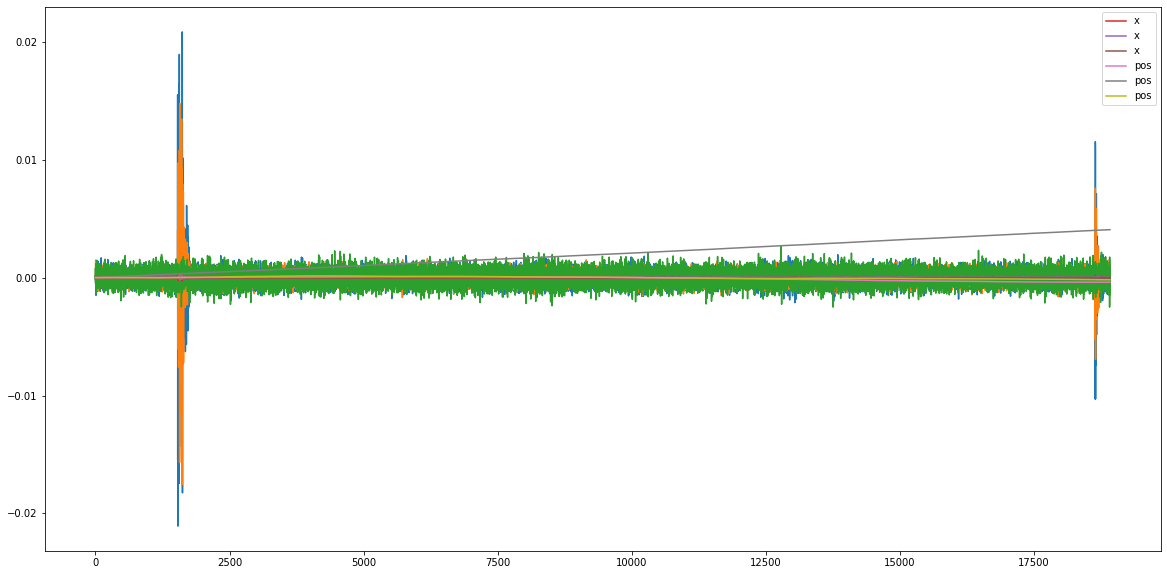

In [5]:
import pandas as pd
from lib.utils import simple_moving_average,numerically_integrate_signal
import matplotlib.pyplot as plt

df = pd.read_csv('data/signal.csv')
x = df['acc_x']
y = df['acc_y']
z = df['acc_z']
t = df['acc_t']


x = x-simple_moving_average(x,10)
y = y-simple_moving_average(y,10)
z = z-simple_moving_average(z,10)
vel_x = numerically_integrate_signal(x,t)
vel_y = numerically_integrate_signal(y,t)
vel_z = numerically_integrate_signal(z,t)

pos_x = numerically_integrate_signal(vel_x,t)
pos_y = numerically_integrate_signal(vel_y,t)
pos_z = numerically_integrate_signal(vel_z,t)
plt.figure(figsize=(20,10))
plt.plot(x)
plt.plot(y)
plt.plot(z)
plt.plot(vel_x,label='x')
plt.plot(vel_y,label='x')
plt.plot(vel_z,label='x')

plt.plot(pos_x,label='pos')
plt.plot(pos_y,label='pos')
plt.plot(pos_z,label='pos')

plt.legend()